In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
maindf = pd.read_csv('../train.csv')
maindf.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
df2131 = maindf.iloc[:, 21:31]
df2131["SalePrice"] = maindf["SalePrice"]
print(df2131.columns)
df2131.tail()

Index(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'SalePrice'],
      dtype='object')


,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,SalePrice
1455,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,175000
1456,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,210000
1457,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,266500
1458,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,142125
1459,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,147500


In [6]:
df2131_BsmtQual = pd.DataFrame(df2131, columns=['BsmtQual'])
df2131_BsmtQual['SalePrice'] = df2131['SalePrice'] 
df2131_f2 = df2131.groupby(['BsmtQual']).size().reset_index(name='Counts')
df2131_f2   # 지하실 높이 평가

,BsmtQual,Counts
0,Ex,121
1,Fa,35
2,Gd,618
3,TA,649


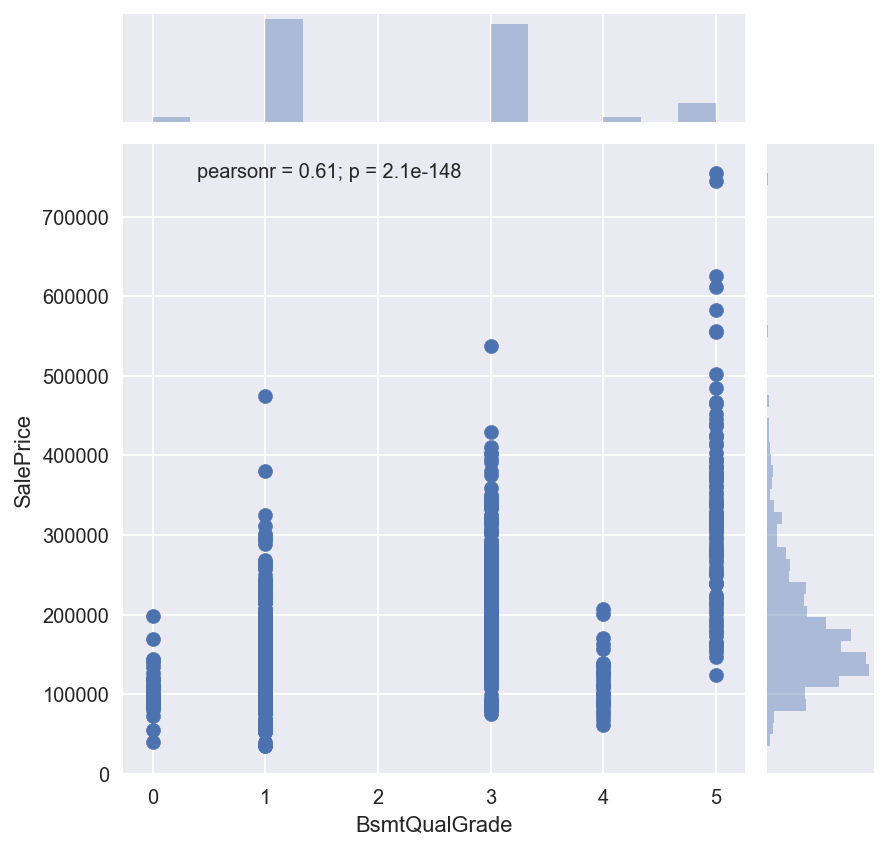

In [7]:
def BsmtQualgrade(data) :
    if data == 'Ex':
        return 5
    if data == 'Fa':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Po':
        return 2
    if data == 'TA':
        return 1
    else:
        return 0
df2131_BsmtQual['BsmtQualGrade'] = df2131_BsmtQual['BsmtQual'].apply(BsmtQualgrade)
sns.jointplot(x="BsmtQualGrade", y="SalePrice", data=df2131_BsmtQual)

In [11]:
df2131_Foundation = pd.DataFrame(df2131, columns=['Foundation'])
df2131_Foundation['SalePrice'] = df2131['SalePrice'] 
df2131_f2 = df2131.groupby(['Foundation']).size().reset_index(name='Counts')
df2131_f2  

# 기초 유형
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood

,Foundation,Counts
0,BrkTil,146
1,CBlock,634
2,PConc,647
3,Slab,24
4,Stone,6
5,Wood,3


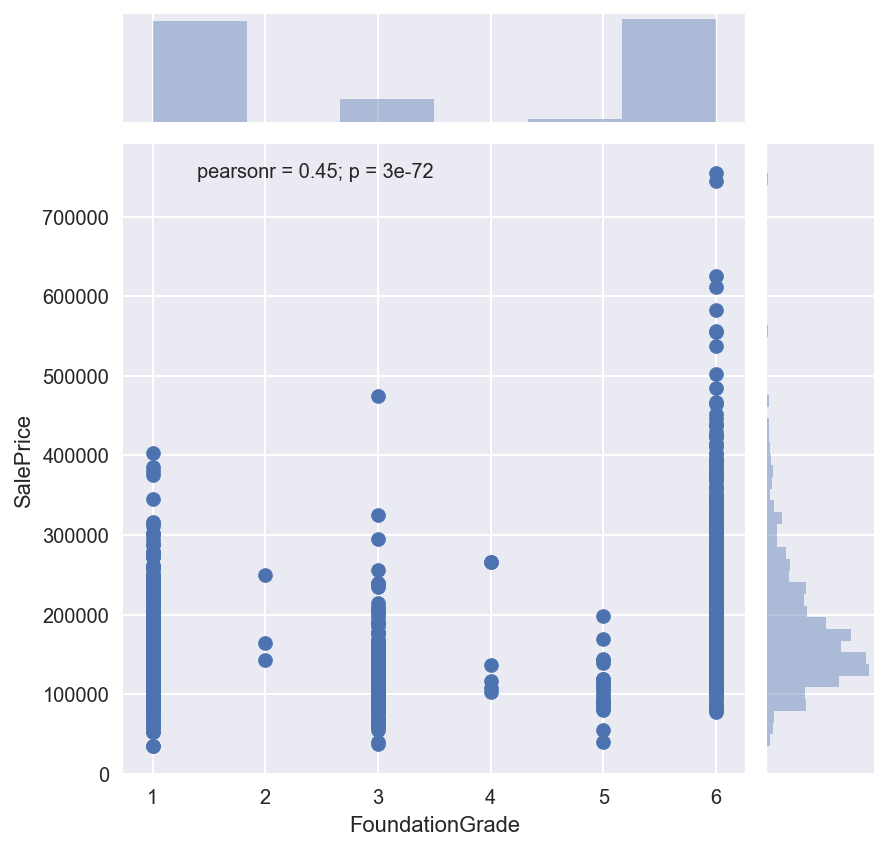

In [16]:
def Foundationgrade(data) :
    if data == 'BrkTil':
        return 3
    if data == 'CBlock':
        return 1
    if data == 'PConc':
        return 6
    if data == 'Slab':
        return 5
    if data == 'Stone':
        return 4
    if data == 'Wood':
        return 2
    else:
        return 0
df2131_Foundation['FoundationGrade'] = df2131_Foundation['Foundation'].apply(Foundationgrade)
sns.jointplot(x="FoundationGrade", y="SalePrice", data=df2131_Foundation)

In [18]:
df2131_ExterCond = pd.DataFrame(df2131, columns=['ExterCond'])
df2131_ExterCond['SalePrice'] = df2131['SalePrice'] 
df2131_f2 = df2131.groupby(['ExterCond']).size().reset_index(name='Counts')
df2131_f2  

,ExterCond,Counts
0,Ex,3
1,Fa,28
2,Gd,146
3,Po,1
4,TA,1282


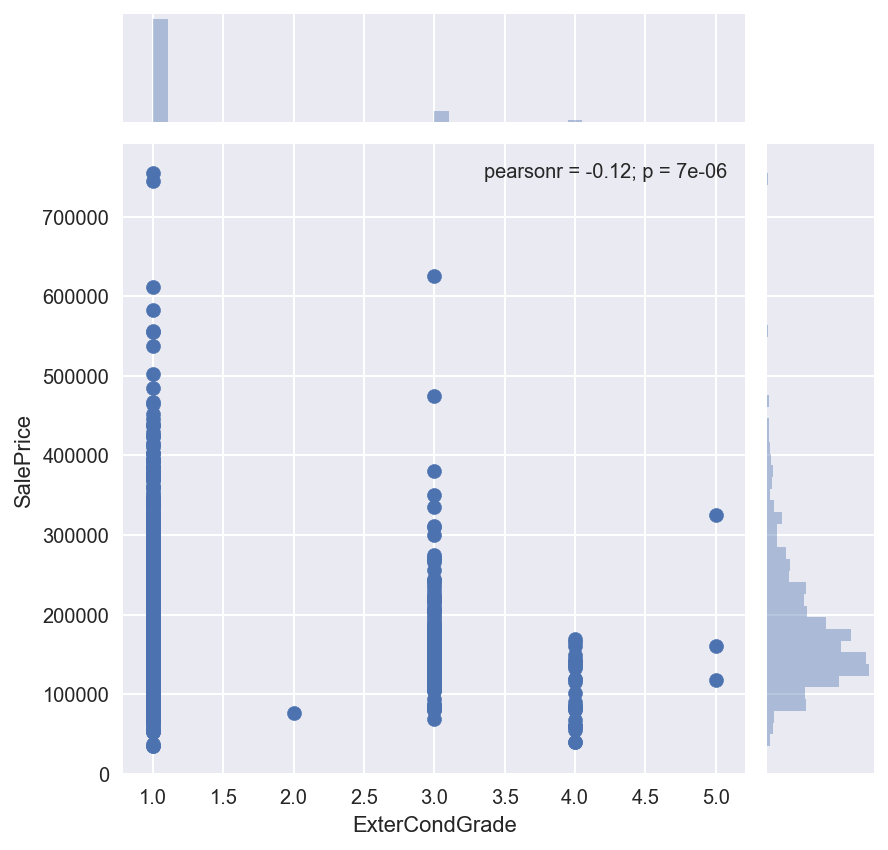

In [20]:
def ExterCondgrade(data) :
    if data == 'Ex':
        return 5
    if data == 'Fa':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Po':
        return 2
    if data == 'TA':
        return 1
    else:
        return 0
df2131_ExterCond['ExterCondGrade'] = df2131_ExterCond['ExterCond'].apply(ExterCondgrade)
sns.jointplot(x="ExterCondGrade", y="SalePrice", data=df2131_ExterCond)

In [21]:
df2131_ExterQual = pd.DataFrame(df2131, columns=['ExterQual'])
df2131_ExterQual['SalePrice'] = df2131['SalePrice'] 
df2131_f2 = df2131.groupby(['ExterQual']).size().reset_index(name='Counts')
df2131_f2  

,ExterQual,Counts
0,Ex,52
1,Fa,14
2,Gd,488
3,TA,906


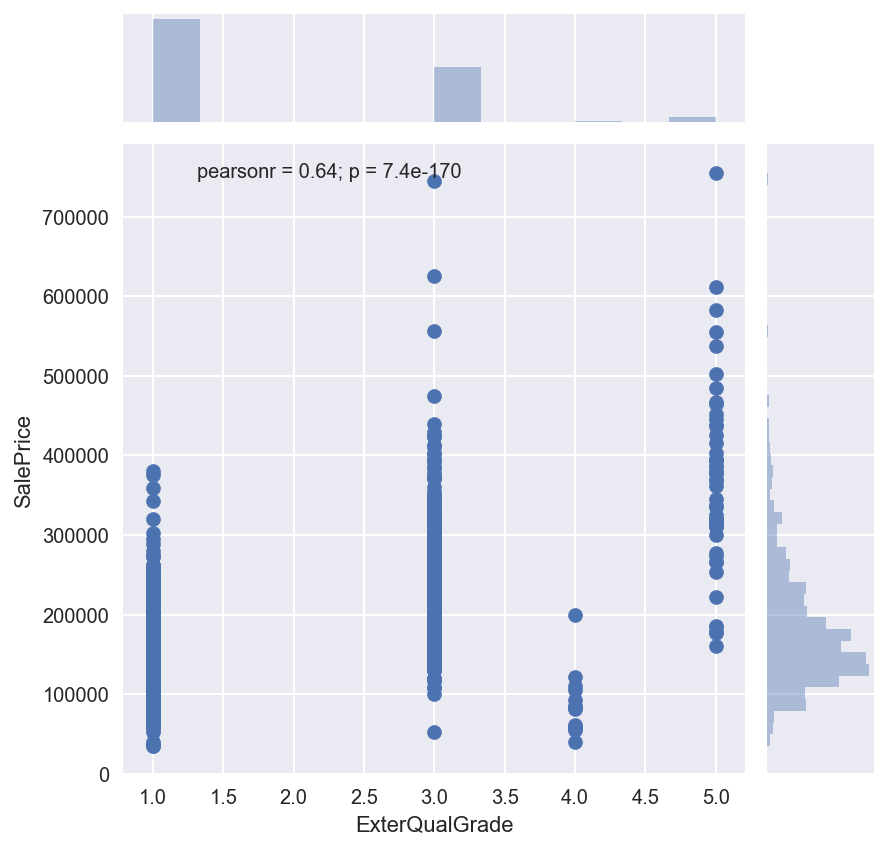

In [22]:
def ExterQualgrade(data) :
    if data == 'Ex':
        return 5
    if data == 'Fa':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Po':
        return 2
    if data == 'TA':
        return 1
    else:
        return 0
df2131_ExterQual['ExterQualGrade'] = df2131_ExterQual['ExterQual'].apply(ExterQualgrade)
sns.jointplot(x="ExterQualGrade", y="SalePrice", data=df2131_ExterQual)